#Regressor - Wines Quality

João Vitor de Paiva Marcotti

Electrical Engineer - State University of Maringá - UEM (Brazil)

8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)

Open to Work

Contact: joaovmarcotti@hotmail.com



# Data Preparation

In [87]:
# Imports the libraries
import pandas as pd
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [88]:
# Imports the Red Wine Quality data
df = pd.read_csv('wineQualityReds.csv')
df

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
# Drops the 'Unnamed 0' column
df = df.drop(['Unnamed: 0'],axis=1)
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [90]:
# Renames the columns titles
df.columns = [column.replace('.', ' ') for column in df.columns]
df.columns = df.columns.str.capitalize()

In [91]:
# Checks if there is any NaN in the df
df.isna().sum()

Fixed acidity           0
Volatile acidity        0
Citric acid             0
Residual sugar          0
Chlorides               0
Free sulfur dioxide     0
Total sulfur dioxide    0
Density                 0
Ph                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

<Axes: >

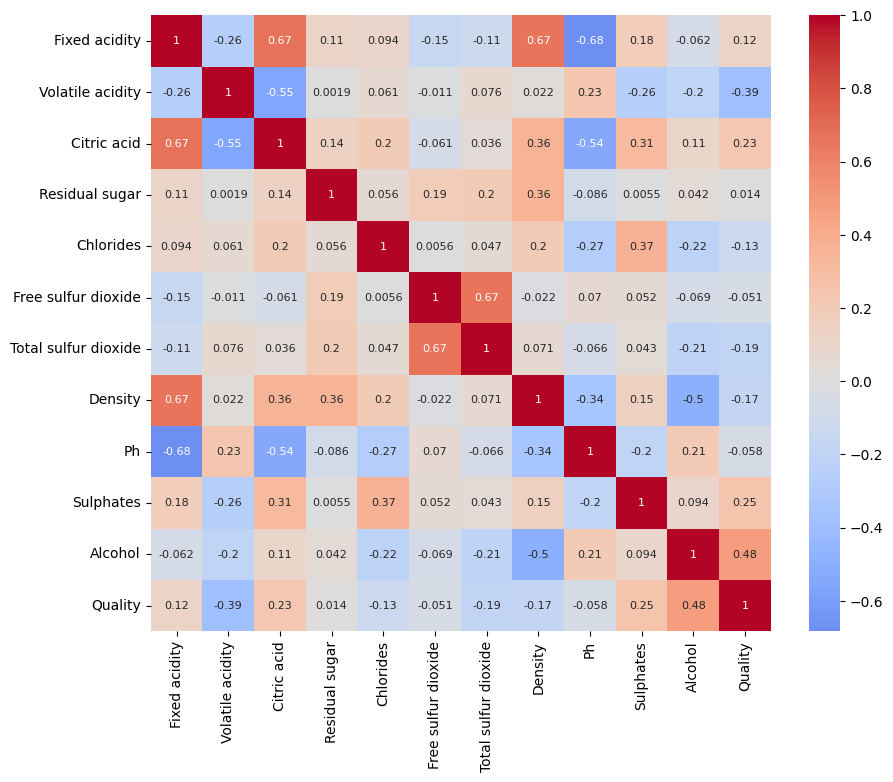

In [92]:
# Displays a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8})

In [93]:
# Sets the Y dataframe
df_y = df['Quality']

In [94]:
# Sets the X dataframe
df_x = df.drop(['Quality'],axis=1)

# X = all

In [95]:
# Splits data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=42)

# Displays the train and test data shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [96]:
# Defines accuracy, mse, model and time lists, to be used to compare the models performance
r2_list = []
mse_list = []
model_list = []
time_list = []

##Naive Bayes - Gaussian

In [97]:
from sklearn.naive_bayes import GaussianNB

# Creates the Gaussian Naive Bayes model

start_time = time.time()

GNB_model = GaussianNB()

GNB_model.fit(x_train, y_train)
y_pred = GNB_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('GNB')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.1106
MSE: 0.5812
Execution Time: 0.0127 s


##SVM Regressor

In [98]:
from sklearn.svm import SVR

# Creates the SVR model

start_time = time.time()

SVR_model = SVR()

SVR_model.fit(x_train, y_train)
y_pred = SVR_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('SVR')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.1852
MSE: 0.5325
Execution Time: 0.1168 s


##Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Creates the Random Forest model

start_time = time.time()

RF_model = RandomForestClassifier(max_depth=150, max_leaf_nodes=150, n_estimators = 40, random_state=42)

RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('RF')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.3497
MSE: 0.425
Execution Time: 0.1515 s


##MLP

In [100]:
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
tf.random.set_seed(42)

# Creates the MLP model

start_time = time.time()

MLP_model = Sequential([
    Dense(x_train.shape[1], kernel_initializer='random_uniform', activation='relu', input_dim=x_train.shape[1]),
    Dense(32, kernel_initializer='random_uniform', activation='relu'),
    Dropout(0.1),
    Dense(1, kernel_initializer='random_uniform', activation='linear')])

MLP_model.compile(optimizer=adam,
                  loss='mean_squared_error')

history = MLP_model.fit(x_train, y_train, validation_split=0.1, epochs=200)

y_pred = MLP_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('MLP')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")

Epoch 1/200
36/36 [==============================] - 1s 6ms/step - loss: 29.0073 - val_loss: 20.7092
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 10.3927 - val_loss: 5.8535
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 5.4792 - val_loss: 3.9775
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 3.6422 - val_loss: 2.3674
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 2.1166 - val_loss: 1.0723
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 1.1627 - val_loss: 0.6360
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.8456 - val_loss: 0.6213
Epoch 8/200
36/36 [==============================] - 0s 3ms/step - loss: 0.8185 - val_loss: 0.6245
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7975 - val_loss: 0.6100
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7789 - val_loss: 0.6007
Epoch 

## Ratings

In [101]:
ratings_first = pd.DataFrame({'Model':model_list, 'R2':r2_list, 'MSE':mse_list, 'Time':time_list})

# X = alcohol, sulphates, citric acid, volatile acidity, fixed acidity, chlorides, total sulfur dioxide

In [102]:
# Choose the X variables
df_x = df_x[['Alcohol','Sulphates','Citric acid','Volatile acidity', 'Fixed acidity', 'Chlorides', 'Total sulfur dioxide']]

In [103]:
# Splits data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 7), (320, 7), (1279,), (320,))

In [104]:
# Defines accuracy, mse, model and time lists, to be used to compare the models performance
r2_list = []
mse_list = []
model_list = []
time_list = []

##Naive Bayes - Gaussian

In [105]:
from sklearn.naive_bayes import GaussianNB

# Creates the Gaussian Naive Bayes model

start_time = time.time()

GNB_model = GaussianNB()

GNB_model.fit(x_train, y_train)
y_pred = GNB_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('GNB')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.1823
MSE: 0.5344
Execution Time: 0.0102 s


##SVM Regressor

In [106]:
from sklearn.svm import SVR

# Creates the SVR model

start_time = time.time()

SVR_model = SVR()

SVR_model.fit(x_train, y_train)
y_pred = SVR_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('SVR')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.1842
MSE: 0.5331
Execution Time: 0.1039 s


##Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestClassifier

# Creates the Random Forest model

start_time = time.time()

RF_model = RandomForestClassifier(max_depth=150, max_leaf_nodes=150, n_estimators = 40, random_state=42)

RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('RF')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.321
MSE: 0.4438
Execution Time: 0.1204 s


##MLP

In [108]:
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
tf.random.set_seed(42)

# Creates the MLP model

start_time = time.time()

MLP_model = Sequential([
    Dense(x_train.shape[1], kernel_initializer='random_uniform', activation='relu', input_dim=x_train.shape[1]),
    Dense(32, kernel_initializer='random_uniform', activation='relu'),
    Dropout(0.1),
    Dense(1, kernel_initializer='random_uniform', activation='linear')])

MLP_model.compile(optimizer=adam,
                  loss='mean_squared_error')

history = MLP_model.fit(x_train, y_train, validation_split=0.1, epochs=200)

y_pred = MLP_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('MLP')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")

Epoch 1/200
36/36 [==============================] - 1s 9ms/step - loss: 30.9243 - val_loss: 27.6358
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 19.2277 - val_loss: 9.0711
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 7.3452 - val_loss: 5.8802
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 5.6875 - val_loss: 4.5582
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 4.4546 - val_loss: 3.2598
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 3.1859 - val_loss: 2.1021
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 2.0040 - val_loss: 1.2460
Epoch 8/200
36/36 [==============================] - 0s 3ms/step - loss: 1.3618 - val_loss: 0.7280
Epoch 9/200
36/36 [==============================] - 0s 3ms/step - loss: 0.9605 - val_loss: 0.6254
Epoch 10/200
36/36 [==============================] - 0s 3ms/step - loss: 0.8878 - val_loss: 0.6122
Epoch 

## Ratings

In [109]:
ratings_second = pd.DataFrame({'Model':model_list, 'R2':r2_list, 'MSE':mse_list, 'Time':time_list})

# X = alcohol, sulphates, citric acid, volatile acidity

In [110]:
# Choose the X variables
df_x = df_x[['Alcohol','Sulphates','Citric acid','Volatile acidity']]

In [111]:
# Splits data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 4), (320, 4), (1279,), (320,))

In [112]:
# Defines accuracy, mse, model and time lists, to be used to compare the models performance
r2_list = []
mse_list = []
model_list = []
time_list = []

##Naive Bayes - Gaussian

In [113]:
from sklearn.naive_bayes import GaussianNB

# Creates the Gaussian Naive Bayes model

start_time = time.time()

GNB_model = GaussianNB()

GNB_model.fit(x_train, y_train)
y_pred = GNB_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('GNB')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.2301
MSE: 0.5031
Execution Time: 0.0104 s


##SVM Regressor

In [114]:
from sklearn.svm import SVR

# Creates the SVR model

start_time = time.time()

SVR_model = SVR()

SVR_model.fit(x_train, y_train)
y_pred = SVR_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('SVR')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.3151
MSE: 0.4476
Execution Time: 0.094 s


##Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Creates the Random Forest model

start_time = time.time()

RF_model = RandomForestClassifier(max_depth=150, max_leaf_nodes=150, n_estimators = 40, random_state=42)

RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('RF')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.2253
MSE: 0.5062
Execution Time: 0.1263 s


##MLP

In [116]:
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
tf.random.set_seed(42)

# Creates the MLP model

start_time = time.time()

MLP_model = Sequential([
    Dense(x_train.shape[1], kernel_initializer='random_uniform', activation='relu', input_dim=x_train.shape[1]),
    Dense(32, kernel_initializer='random_uniform', activation='relu'),
    Dropout(0.1),
    Dense(1, kernel_initializer='random_uniform', activation='linear')])

MLP_model.compile(optimizer=adam,
                  loss='mean_squared_error')

history = MLP_model.fit(x_train, y_train, validation_split=0.1, epochs=200)

y_pred = MLP_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('MLP')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")

Epoch 1/200
36/36 [==============================] - 1s 6ms/step - loss: 31.6790 - val_loss: 30.4731
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 27.9136 - val_loss: 23.3368
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 16.6631 - val_loss: 8.2296
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 3.4626 - val_loss: 0.5071
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.8004 - val_loss: 0.4791
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.7601 - val_loss: 0.4692
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7741 - val_loss: 0.4698
Epoch 8/200
36/36 [==============================] - 0s 3ms/step - loss: 0.7313 - val_loss: 0.4682
Epoch 9/200
36/36 [==============================] - 0s 3ms/step - loss: 0.7313 - val_loss: 0.4672
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7687 - val_loss: 0.4678
Epoc

## Ratings

In [117]:
ratings_third = pd.DataFrame({'Model':model_list, 'R2':r2_list, 'MSE':mse_list, 'Time':time_list})

# X = alcohol, sulphates, citric acid

In [118]:
# Choose the X variables
df_x = df_x[['Alcohol','Sulphates','Citric acid']]

In [119]:
# Splits data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 3), (320, 3), (1279,), (320,))

In [120]:
# Defines accuracy, mse, model and time lists, to be used to compare the models performance
r2_list = []
mse_list = []
model_list = []
time_list = []

##Naive Bayes - Gaussian

In [121]:
from sklearn.naive_bayes import GaussianNB

# Creates the Gaussian Naive Bayes model

start_time = time.time()

GNB_model = GaussianNB()

GNB_model.fit(x_train, y_train)
y_pred = GNB_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('GNB')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.101
MSE: 0.5875
Execution Time: 0.0135 s


##SVM Regressor

In [122]:
from sklearn.svm import SVR

# Creates the SVR model

start_time = time.time()

SVR_model = SVR()

SVR_model.fit(x_train, y_train)
y_pred = SVR_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('SVR')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.2642
MSE: 0.4809
Execution Time: 0.0985 s


##Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Creates the Random Forest model

start_time = time.time()

RF_model = RandomForestClassifier(max_depth=150, max_leaf_nodes=150, n_estimators = 40, random_state=42)

RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('RF')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")


R2: 0.1727
MSE: 0.5406
Execution Time: 0.1022 s


##MLP

In [124]:
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
tf.random.set_seed(42)

# Creates the MLP model

start_time = time.time()

MLP_model = Sequential([
    Dense(x_train.shape[1], kernel_initializer='random_uniform', activation='relu', input_dim=x_train.shape[1]),
    Dense(32, kernel_initializer='random_uniform', activation='relu'),
    Dropout(0.1),
    Dense(1, kernel_initializer='random_uniform', activation='linear')])

MLP_model.compile(optimizer=adam,
                  loss='mean_squared_error')

history = MLP_model.fit(x_train, y_train, validation_split=0.1, epochs=200)

y_pred = MLP_model.predict(x_test)

print("")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2:", round(r2,4))
print("MSE:", round(mse,4))

end_time = time.time()
execution_time = end_time - start_time

r2_list.append(round(r2,4))
mse_list.append(round(mse,4))
model_list.append('MLP')
time_list.append(execution_time)

print("Execution Time:", round(execution_time, 4),"s")

Epoch 1/200
36/36 [==============================] - 1s 6ms/step - loss: 31.9484 - val_loss: 31.3213
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 30.6246 - val_loss: 29.2285
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 27.3440 - val_loss: 24.2756
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 20.5685 - val_loss: 15.5911
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 11.2257 - val_loss: 6.1226
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 3.7684 - val_loss: 1.1435
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 1.1106 - val_loss: 0.4447
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 0.8904 - val_loss: 0.4411
Epoch 9/200
36/36 [==============================] - 0s 3ms/step - loss: 0.8911 - val_loss: 0.4399
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 0.9152 - val_loss: 0.4400


## Ratings

In [125]:
ratings_fourth = pd.DataFrame({'Model':model_list, 'R2':r2_list, 'MSE':mse_list, 'Time':time_list})

# Ratings

In [126]:
# First test ratings
ratings_first

,Model,R2,MSE,Time
0,GNB,0.1106,0.5812,0.012732
1,SVR,0.1852,0.5325,0.116755
2,RF,0.3497,0.4250,0.151479
3,MLP,0.3607,0.4178,41.645653


In [127]:
# Second test ratings
ratings_second

,Model,R2,MSE,Time
0,GNB,0.1010,0.5875,0.013487
1,SVR,0.2642,0.4809,0.098483
2,RF,0.1727,0.5406,0.102184
3,MLP,0.2809,0.4699,21.193648


In [128]:
# Third test ratings
ratings_third

,Model,R2,MSE,Time
0,GNB,0.2301,0.5031,0.010444
1,SVR,0.3151,0.4476,0.094005
2,RF,0.2253,0.5062,0.126311
3,MLP,0.3803,0.4050,21.454689


In [129]:
# Fourth test ratings
ratings_fourth

,Model,R2,MSE,Time
0,GNB,0.1010,0.5875,0.013487
1,SVR,0.2642,0.4809,0.098483
2,RF,0.1727,0.5406,0.102184
3,MLP,0.2809,0.4699,21.193648
